In [ ]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Práctica 8: Componentes principales

## Ej 1: Dada la siguiente tabla de datos correspondientes a la longitud y el ancho de las tortugas pintadas

In [ ]:

df = {"Longitud": [93, 94, 96, 101, 102, 103, 104, 106],
      "Ancho": [76, 78, 80, 84, 85, 82, 83, 83]}
df = pd.DataFrame(df)
df

### a) Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión. Estimar la presencia de correlación entre las variables a partir de este gráfco

In [ ]:
df[["Longitud", "Ancho"]] = MinMaxScaler().fit_transform(df[["Longitud", "Ancho"]])
df

In [ ]:
# Graficamos
(
    so.Plot(data = df, x = "Longitud", y = "Ancho")
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(color = "blue"), data = df, x = "Longitud", y = "Ancho")
)

In [ ]:
df.corr()

### b) Calcular la matriz de covarianzas y hallar sus autovalores y autovectores

In [ ]:
df_star = df - df.mean()

Sigma = (df_star.transpose() @ df_star) / len(df_star)

In [ ]:
# Matriz de covarianza
np.cov(df.transpose(), bias = 1)

In [ ]:
# Autovalores , Autovectores
gamma, U = np.linalg.eigh(Sigma)   # eigh es un comando especial para matrices simétricas
print("avals: \n", gamma, "\n")
print("avecs: \n",U)

### c) Hallar las componentes principales

In [ ]:
(
    so.Plot()
    .add(so.Dot(), x = df_star["Longitud"], y = df_star["Ancho"])
    .add(so.Line(color = "red"), x = [0,U[0,0]], y = [0,U[1,0]])
    .add(so.Line(color = "green"), x = [0,U[0,1]], y = [0,U[1,1]])
    .layout(size = (6, 6))
)

# Verde: 1er componente ppal
# Rojo: 2do componente ppal

In [ ]:
# U son las direcciones del nuevo espacio
# Calculamos las componentes principales usando la formula
# Z = (df - df_raya) * U = df_star * U


Z = df_star @ U 
Z.columns = ["Z" + str(i + 1) for i in Z.columns]
Z

Estos son los componentes principales

---

### d) Decidir si la información está mayormente representada en una de estas dos componentes

In [ ]:
# Graficamos
(
    so.Plot(data = Z, x = "Z1", y = "Z2", text = df.index)
    .add(so.Dot())
    .add(so.Text())    
    .layout(size=(6,6))
)

In [ ]:
# Repetimos todo lo mismo usando los comandos de Python

pca = PCA(n_components=2)

# principalComponents devuelve X_star * U
principalComponents = pca.fit_transform(df_star)
print(principalComponents)

In [ ]:
# Graficamos
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = df.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(6,6))
)

Confio mas en esta representacion ya que usamos directamente la funcion pca, y no la armamos de 0 a mano.

In [ ]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_

La informacion esta igualmente representada en las 2 componentes

---

### e) Indicar la proporción de la variabilidad explicada por cada una de ellas. ¿A que conclusión puede llegar?

In [ ]:
print(Sigma, " \n")

# autovalores ordenados de mayor a menor
av = np.flip(U)
print("Autovalores: ", av, " \n")

print("Varianza explicada por la primera componente:  \n", av[0] / sum(av))
print("Varianza explicada por la segunda componente:  \n", av[1] / sum(av))

Llegamos entonces a que los autovalores tienen el mismo peso, y tambien la varianza explicada en la componente 1 es casi identica a la de la componente 2 solo que con un -9.97 en vez de un 10. 
No se is influye.

## Ej 2: Sea A la matriz de covarianzas de una cierta muestra de datos cuya media es cero.

$$
A = \left(
   \begin{array}{cccc}
    3 & 1 & 1 \\
    1 & 3 & 1\\
    1 & 1 & 5\\
   \end{array}
   \right)
$$

### a) Hallar los autovalores y autovectores de la matriz de covarianzas.

In [ ]:
a = np.matrix([[3, 1, 1], [1, 3, 1], [1, 1, 5]])

In [ ]:
# Matriz de covarianza
a_cov = np.cov(a.transpose(), bias = 1)
a_cov

In [ ]:
# Autovalores , Autovectores
gamma, U = np.linalg.eigh(a_cov)   # eigh es un comando especial para matrices simétricas
print("avals: \n", gamma, "\n")
print("avecs: \n",U)

# Creo que printea mal los avecs y avals. Preguntar a los profesores

### b) Dar la expresión de las componentes principales z1, z2, z3 e indicar la proporción de la variabilidad explicada por cada una de ellas

In [ ]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(a_cov)
print(principalComponents)

In [ ]:
Z = a @ U
Z

In [ ]:
Z = pd.DataFrame(a @ U, columns=["Z1", "Z2", "Z3"])
Z

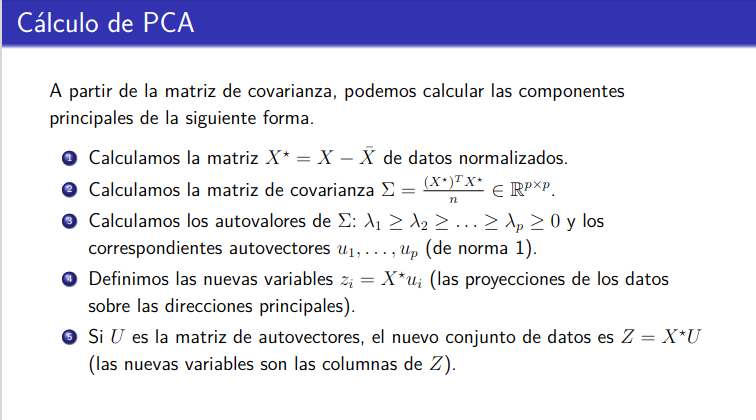


In [ ]:
# 1. No hace falta si usamos la matriz de covarianza a_cov en lugar de a

# 2. Matriz de covarianza
a_cov

# 3. Obtener los autovalores y autovectores
avals, U = np.linalg.eig(a_cov)

print("Autovalores:")
print(avals)
print("\nAutovectores:")
print(U)

In [ ]:
# 4. Definimos las nuevas variables Z_i = X * U_i (en este caso X = a)
Z = a @ U
Z = pd.DataFrame(Z, columns=["Z1", "Z2", "Z3"])
Z

In [ ]:
# autovalores ordenados de mayor a menor
print("Autovalores: \n", avals, " \n")

print("Varianza explicada por la primera componente:  \n", avals[0] / sum(avals))
print("Varianza explicada por la segunda componente:  \n", avals[1] / sum(avals))
print("Varianza explicada por la tercera componente:  \n", avals[2] / sum(avals))

Podemos ver que la varianza explicada por la 2da componente es la mas pesada, entonces si nos tuvieramos que quedar con un lambda , éste sería el 1ro, pues tiene mayor peso.

Ademas ya que tenemos los autovalores, podemos calcular la varianza total:

 $$ \lambda_1 + \lambda_2 + \lambda_3 = 4 + 0 + 1.33 = 5.33 $$


### c) Hallar los scores de las primeras dos componentes principales correspondientes a la observación x1 = 2, x2 = 2, x3 = 1 (es decir, los valores de z1 y z2 para dicha observación.

In [ ]:
# Observación x1 = 2, x2 = 2, x3 = 1
x = np.array([2, 2, 1])

# Estandarizar la observación
x_std = (x - x.mean()) / x.std()

# Calcular los scores de las primeras dos componentes principales
scores = x_std @ U[:, :2] # Seleccionamos todas las filas de U, pero solo las dos primeras columnas.

# Imprimir los scores
print(scores)

In [ ]:
# Recordar que podemos obtener Z1, Z2, Z3. Pero nos interesan solamente Z1 y Z2.
scores = x_std @ U
scores

## Ej 3: Implementar un programa que reciba como input un archivo de datos y un número p_acum y devuelva la mínima cantidad de componentes principales que deben considerarse para que el porcentaje de varianza acumulada sea mayor o igual que p_acum.

In [ ]:
# Implementamos el programa p_acum que devuelve la minima cant de comp ppales tq la varianza acumulada sea >= a p_acum
# Supongo que con archivo de datos se refiere a una matriz ??
def p_acum(datos, p_acum):
    # normalizamos los datos
    datos_norm = datos - datos.mean()

    # calculamos la matriz de covarianza
    cov = np.cov(datos_norm.transpose(), bias = 1)

    # calculamos los autovalores y autovectores
    avals, U = np.linalg.eig(cov)

    # ordenamos los autovalores de mayor a menor
    avals = np.flip(np.sort(avals)) # sort devuelve menor a mayor, flip lo ordena mayor a menor

    # calculamos la varianza acumulada
    var_acum = np.cumsum(avals) / sum(avals)

    # calculamos la cantidad de componentes principales necesarias
    n = 1
    while var_acum[n - 1] < p_acum:
        n += 1
    
    return n



In [ ]:
# Probemos con el ejemplo de la matriz a que usamos antes y p_acum = 0.95
p_acum(a, 0.95)

## Ej 4: Considerando el archivo de datos p8-chalets.csv se pide:

In [ ]:
# importar p8-chalets.csv
chalets_df = pd.read_csv("dataset/p8-chalets.csv")

### a) Graficar los diagramas de dispersión de las variables de a pares. Estimar la presencia de correlación entre las variables a partir de estos gráficos.